# **Python for Data Science Assignment 2 - NYC Property Sales Analysis**

Fikri Fahreza

KS10-015


---

## **Download dataset**

In [1]:
# Install kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
# Mount google colab dengan drive untuk mengambil API Kaggle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Download dataset dari kaggle
!kaggle datasets download -d new-york-city/nyc-property-sales

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 120MB/s]


In [6]:
# Ekstrak zip
!unzip nyc-property-sales.zip

Archive:  nyc-property-sales.zip
  inflating: nyc-rolling-sales.csv   


# **Pengenalan**
Halo! Nama saya Fikri Fahreza, ini adalah tugas kedua saya yang dipublikasi, dengan menggunakan NYC Property Sales Dataset dari Kaggle.

Saya berharap dari tugas ini bisa menghasilkan *feedback* atau komentar tentang analisis ini.

LinkedIn: https://www.linkedin.com/in/fikri-fahreza/

# **Daftar isi:**


1.   [Konteks](#scrollTo=4F0a2HWnWfFT)
2.   [Data Preprocessing](#scrollTo=8Ac1ac3-pQnb)
3.   [Data Analysis](#scrollTo=gJr-USMtwTWw)
4.   [Kesimpulan](#scrollTo=u7mq6A9itf4Q)

---

# **1. Konteks**
Dataset ini adalah catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang terjual di pasar properti New York City selama periode 12 bulan (1 September 2016 - 31 Agustus 2017). Data ini berasal dari Kaggle, lebih tepatnya pada link berikut ini: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

## **1.1. Atribut dari data**
* `BOROUGH`: Nama wilayah.
* `NEIGHBORHOOD`: Nama lingkungan (daerah sekitar).
* `BUILDING CLASS CATEGORY`: Kategori kelas bangunan.
* `TAX CLASS AT PRESENT` : Kategori kelas pajak (berdasarkan kegunaan properti).
* `BLOCK`: Merupakan sub-divisi dari **BOROUGH** yang merepresentasikan lokasi asli terkait letak properti, digunakan untuk membedakan sebuah unit dengan unit lainnya.
* `LOT`: Merupakan sub-divisi dari **BLOCK** yang merepresentasikan lokasi unik terkait letak properti, digunakan untuk membedakan sebuah unit dengan unit lainnya.
* `EASEMENT`: Merupakan hak, seperti hak jalan, yang memungkinkan entitas untuk menggunakan properti orang lain secara terbatas. Misalnya: rel kereta api yang melintasi sebagian properti lain.
* `BUILDING CLASS AT PRESENT`: Klasifikasi bangunan yang digunakan untuk mendeskripsikan penggunaan konstruktif bangunan.
* `ADDRESS`: Nama jalan.
* `ZIP CODE`: Kode pos.
* `RESIDENTIAL UNITS`: Jumlah unit residential di properti yang terdaftar.
* `COMMERCIAL UNITS`: Jumlah unit commercial di properti yang terdaftar.
* `TOTAL UNITS`: Total unit di properti yang terdaftar.
* `LAND SQUARE FEET`: Luas tanah properti yang terdaftar (dalam satuan square feet).
* `GROSS SQUARE FEET`: Luas total semua lantai bangunan yang diukur dari permukaan luar dinding luar bangunan, termasuk luas tanah dan ruang di dalam bangunan atau struktur apa pun pada properti (dalam satuan square feet).
* `YEAR BUILT`: Tahun terkait struktur properti tersebut dibangun.
* `BULDING CLASS AT TIME OF SALE`: Klasifikasi bangunan yang digunakan untuk mendeskripsikan penggunaan konstruktif bangunan.
* `SALES PRICE`: Harga yang dibayarkan untuk properti.
* `SALE DATA`: Tanggal properti terjual.

**INFO**
* BOROUGH: Kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
* BLOCK; LOT: Kombinasi borough, block, dan lot membentuk *unique key* untuk properti di New York City. Umumnya disebut BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: Jenis bangunan di berbagai titik waktu..

**CATATAN**
- Banyak penjualan terjadi dengan jumlah harga yang sangat kecil: $0 paling umum. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mentransfer kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun. 
- Dataset ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal, satu entitas memiliki bangunan yang bersangkutan, penjualan mencakup nilai seluruh bangunan. Dalam hal sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

## **1.2. Tujuan analisis**

Merumuskan pertanyaan untuk menjawab pertanyaan terkait dan membuat hipotesis untuk membuktikannya.

## **1.3. Pertanyaan**

1. `Berapakah harga jual properti yang terdapat pada masing-masing wilayah? (Measure of Central Tedency : Median)`
2. `Berapakah rata-rata luas tanah yang banyak terjual di wilayah Bronx? (Measure of Central Tedency : Mean)`
3. `Properti yang dibangun tahun berapakah yang banyak terjual di wilayah Staten Island? (Measure of Central Tedency : Modus)`
4. `Berapakah rentang harga properti di daerah Alphabet City? (Measured of Spread : Range)`
5. `Berapa nilai variance dari luas tanah di daerah Alphabet City (Measured of Spread : Variance)`
6. `Berapa nilai standard deviation dari luas tanah di daerah Alphabet City (Measured of Spread : Standard Deviation)`
7. `Bagaimana distribusi harga jual di daerah Alphabet City? (Probability Distribution)`
8. `Bagaimana confidence interval untuk harga jual di daerah Alphabet City (Confidence Interval)`
9. `Apakah ada hubungan antara SALE PRICE dan LAND SQUARE FEET (Hypothesis Testing)`



---



# **2. Data Preprocessing**

Pada bagian ini, kita akan melakukan import data, transformasi, dan lain sebagainya. Tujuannya agar data sudah siap kita olah, *yummy!*

## **2.1. Import data dan library**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
# Membaca CSV ke DataFrame
df = pd.read_csv("nyc-rolling-sales.csv")

## **2.2. Memeriksa dan bersihkan data**

Kita akan memeriksa data, jika terdapat *missing values* atau terdapat bagian tidak sesuai dengan yang kita harapkan, maka bisa langsung kita bersihkan, untuk menghindari hasil analisa yang *bias* atau *unfair*. 

*Garbage In Garbage Out!*

In [9]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Berikut contoh data yang terdapat didalam dataset terkait. Kita akan mengganti nilai data pada kolom **BOROUGH** terlebih dahulu.

In [10]:
# Mengganti nilai data kolom BOROUGH
df["BOROUGH"].replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}, inplace=True)

In [11]:
# Informasi terkait tipe data, nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Banyak tipe data yang belum sesuai dengan yang diharapkan dan terdapat variabel yang tidak kita butuhkan setelah melihat *preview* data diatas. Kita akan menanganinya di bagian selanjutnya.

In [12]:
# Mengubah SALE PRICE, LAND SQUARE FEET dan GROSS SQUARE FEET ke numeric
df["SALE PRICE"] = pd.to_numeric(df["SALE PRICE"], errors="coerce")
df["LAND SQUARE FEET"] = pd.to_numeric(df["LAND SQUARE FEET"], errors="coerce")
df["GROSS SQUARE FEET"] = pd.to_numeric(df["GROSS SQUARE FEET"], errors="coerce")

# Mengubah SALE DATE ke datetime
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"], errors="coerce")

# Mengubah TAX CLASS ke kategori
df["TAX CLASS AT TIME OF SALE"] = df["TAX CLASS AT TIME OF SALE"].astype("category")
df["TAX CLASS AT PRESENT"] =df["TAX CLASS AT PRESENT"].astype("category")

Berikut variabel yang harus kita ubah tipe datanya dan mari kita cek kembali apakah ada nilai *null*.

In [13]:
print("Missing values (percentage)")
for k, v in zip(df.columns,np.round((df.isna().sum() / len(df) * 100), 2)):
  print(f"{k}: {v}%")

Missing values (percentage)
Unnamed: 0: 0.0%
BOROUGH: 0.0%
NEIGHBORHOOD: 0.0%
BUILDING CLASS CATEGORY: 0.0%
TAX CLASS AT PRESENT: 0.0%
BLOCK: 0.0%
LOT: 0.0%
EASE-MENT: 0.0%
BUILDING CLASS AT PRESENT: 0.0%
ADDRESS: 0.0%
APARTMENT NUMBER: 0.0%
ZIP CODE: 0.0%
RESIDENTIAL UNITS: 0.0%
COMMERCIAL UNITS: 0.0%
TOTAL UNITS: 0.0%
LAND SQUARE FEET: 31.05%
GROSS SQUARE FEET: 32.66%
YEAR BUILT: 0.0%
TAX CLASS AT TIME OF SALE: 0.0%
BUILDING CLASS AT TIME OF SALE: 0.0%
SALE PRICE: 17.22%
SALE DATE: 0.0%


Dapat dilihat SALE PRICE, LAND SQUARE FEET, dan GROSS SQUARE FEET memiliki nilai *null*. Kita akan langsung menghapusnya.

In [14]:
# Menghapus nilai null
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      48244 non-null  int64         
 1   BOROUGH                         48244 non-null  object        
 2   NEIGHBORHOOD                    48244 non-null  object        
 3   BUILDING CLASS CATEGORY         48244 non-null  object        
 4   TAX CLASS AT PRESENT            48244 non-null  category      
 5   BLOCK                           48244 non-null  int64         
 6   LOT                             48244 non-null  int64         
 7   EASE-MENT                       48244 non-null  object        
 8   BUILDING CLASS AT PRESENT       48244 non-null  object        
 9   ADDRESS                         48244 non-null  object        
 10  APARTMENT NUMBER                48244 non-null  object        
 11  ZI

Dapat dilihat bahwa kita sudah tidak memiliki nilai null.

In [16]:
df.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,10448.940511,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,7574.416359,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3919.750000,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,8084.000000,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,17160.000000,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,26702.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


Berikut ringkasan statistik untuk tipe data number. Terdapat beberapa hal menarik disini, yaitu:

- Terdapat kolom yang tidak kita butuhkan seperti Unnamed: 0.
- ZIP CODE yang memiliki nilai 0, yang pastinya tidak mungkin.
- Terdapat setidaknya 1 TOTAL UNIT pada 50% dari jumlah data.
- SQUARE FEET yang memiliki nilai 0, yang seharusnya tidak mungkin.
- YEAR BUILT yang memiliki nilai 0, lagi dan lagi tidak mungkin.
- Beberapa SALE PRICE memiliki nilai 0, yang juga tidak mungkin atau terjadi pemindahan hak akta yang sebenarnya bukan penjualan.

In [17]:
df.describe(exclude="number")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,48244,48244,48244,48244,48244,48244,48244,48244,48244.0,48244,48244
unique,5,251,47,11,1,160,42054,1559,4.0,160,362
top,Brooklyn,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,,A1,429 KENT AVENUE,,1.0,A1,2016-12-22 00:00:00
freq,24047,1436,14394,31194,48244,5252,158,41502,32455.0,5247,332
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-31 00:00:00


Berikut ringkasan statistik untuk tipe data object/category. Terdapat beberapa hal menarik disini, yaitu: 
- Terdapat kolom yang tidak kita butuhkan seperti EASEMENT karena hanya memiliki 1 data unik 
- APARTMENT NUMBER yang memiliki banyak nilai kosong, tetapi tidak terdeteksi sebagai *missing values*.

In [18]:
# Menghapus kolom Unnamed: 0 dan EASE-MENT
df.drop(columns=["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], inplace=True)

Kolom Unnamed: 0, APARTMENT NUMBER dan EASE-MENT sudah terhapus. Berikutnya kita memeriksa apakah terdapat data duplikat.

In [19]:
# Memeriksa data duplikat
df.duplicated().sum()

348

Langsung saja kita menghapus data duplikat.

In [20]:
# Menghapus data duplikat
df.drop_duplicates(subset=df.columns, keep="last", inplace=True)

Data duplikat sudah terhapus. Selanjutnya kita menghapus data yang tidak sesuai, seperti ZIP CODE yang memiliki nilai 0, dsb.

In [21]:
# Filtering data yang memiliki nilai 0
df = df[df["SALE PRICE"] > 0]
df = df[df["LAND SQUARE FEET"] > 0]
df = df[df["GROSS SQUARE FEET"] > 0]
df = df[df["ZIP CODE"] > 0]
df = df[df["YEAR BUILT"] > 0]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29189 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         29189 non-null  object        
 1   NEIGHBORHOOD                    29189 non-null  object        
 2   BUILDING CLASS CATEGORY         29189 non-null  object        
 3   TAX CLASS AT PRESENT            29189 non-null  category      
 4   BLOCK                           29189 non-null  int64         
 5   LOT                             29189 non-null  int64         
 6   BUILDING CLASS AT PRESENT       29189 non-null  object        
 7   ADDRESS                         29189 non-null  object        
 8   ZIP CODE                        29189 non-null  int64         
 9   RESIDENTIAL UNITS               29189 non-null  int64         
 10  COMMERCIAL UNITS                29189 non-null  int64         
 11  TO

Data yang kita miliki hanya tersisa **29189** data.



---



# **3. Data Analysis**

Pada bagian ini, kita akan menjawab pertanyaan bisnis yang terdapat di **Bagian 1.3.**

## **3.1. Berapakah harga jual properti yang terdapat pada masing-masing wilayah?** (Measure of Central Tedency : Median)

In [23]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Mencari median harga jual berdasarkan wilayah
df.groupby("BOROUGH").agg("median")["SALE PRICE"].sort_values(ascending=False)

BOROUGH
Manhattan       6500000.00
Brooklyn         850000.00
Queens           635000.00
Staten Island    485000.00
Bronx            480000.00
Name: SALE PRICE, dtype: float64

Manhattan menjadi wilayah yang setidaknya memiliki harga penjualan paling tinggi, yaitu sebesar **6,500,000.00 USD Dollar** dan Bronx mempunyai nilai setidaknya yang paling rendah, yaitu sebesar **480,000.00 USD Dollar**. Nilai ini diambil menggunakan median karena terdapat outlier yang lumayan besar nilanya.

## **3.2. Berapakah rata-rata luas tanah yang banyak terjual di wilayah Bronx?** (Measure of Central Tedency : Mean)

In [24]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Filtering wilayah Bronx
mask = df["BOROUGH"] == "Bronx"
# Mencari mean luas tanah yang terjual di wilayah Bronx
print(f"Luas tanah rata-rata yang terjual di wilayah Bronx: {np.mean(df[mask]['LAND SQUARE FEET'])}")

Luas tanah rata-rata yang terjual di wilayah Bronx: 4469.908701854493


4469.91 square feet menjadi rata-rata luas tanah yang terjual di wilayah Bronx.

## **3.3. Properti yang dibangun tahun berapakah yang banyak terjual di wilayah Staten Island?** (Measure of Central Tedency : Modus)

In [25]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Filtering wilayah Staten Island
mask = df["BOROUGH"] == "Staten Island"
# Mencari nilai modus
stats.mode(df[mask]['YEAR BUILT'])

ModeResult(mode=array([1970]), count=array([348]))

Properti yang dibangun pada tahun 1970 menjadi yang paling banyak terjual di wilayah Staten Island dengan jumlah 348 yang terjual di tahun 2016-2017.

## **3.4. Berapakah rentang harga properti di daerah Alphabet City?** (Measured of Spread : Range)

In [26]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Filtering daerah Alphabet City
mask = df["NEIGHBORHOOD"] == "ALPHABET CITY"
# Mencari nilai modus
print(f"Min: {df[mask]['SALE PRICE'].min()}")
print(f"Max: {df[mask]['SALE PRICE'].max()}")
print(f"Rentang luas bangunan: {df[mask]['SALE PRICE'].max() - df[mask]['SALE PRICE'].min()}")

Min: 3192840.0
Max: 16232000.0
Rentang luas bangunan: 13039160.0


Pada daerah Alphabet City memiliki rentang harga properti yang berkisar **13,039,160 USD Dollar** dengan luas bangunan terkecil sebesar **3,192,840 USD Dollar** dan terbesar sebesar **16,232,000 USD Dollar**

## **3.5. Berapa nilai variance dari luas tanah di daerah Alphabet City** (Measured of Spread : Variance)

In [27]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Filtering daerah Alphabet City
mask = df["NEIGHBORHOOD"] == "ALPHABET CITY"
# Mencari nilai variance
df[mask]["LAND SQUARE FEET"].var()

1267775.8181818184

Sample variance dari luas tanah di daerah Alphabet City adalah sebesar **1,267,775.81**.

## **3.6. Berapa nilai standard deviation dari luas tanah di daerah Alphabet City** (Measured of Spread : Standard Deviation)

In [28]:
# Menghilangkan exponent number
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Filtering daerah Alphabet City
mask = df["NEIGHBORHOOD"] == "ALPHABET CITY"
# Mencari nilai standard deviation
df[mask]["LAND SQUARE FEET"].std()

1125.9555134115283

Sample standard deviation dari luas tanah di daerah Alphabet City adalah sebesar **1125.96**.

## **3.7. Bagaimana distribusi harga jual di daerah Alphabet City?** (Probability Distribution)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


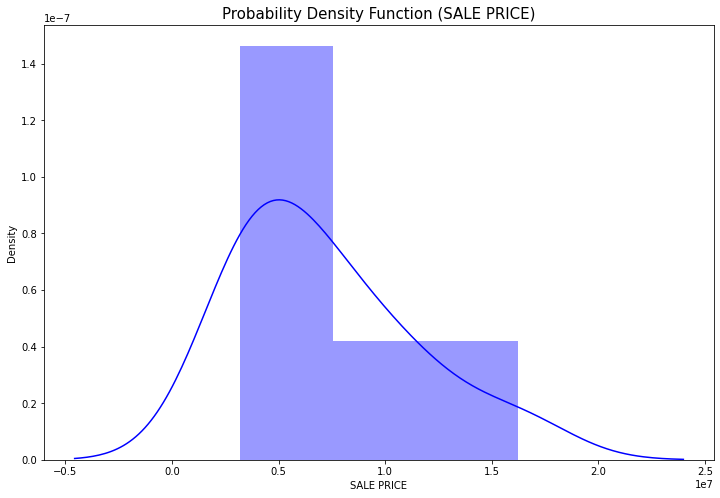

In [29]:
plt.figure(figsize=(12,8))
sns.distplot(df[mask]["SALE PRICE"], kde=True, color='blue')
plt.title("Probability Density Function (SALE PRICE)", fontsize=15);

Distribusi harga jual di daerah Alphabet City cenderung skew ke kiri yang mengindikasikan terdapat harga jual atas yang jauh dari rata-rata.

## **3.8. Bagaimana confidence interval untuk harga jual di daerah Alphabet City** (Confidence Interval)

Sebelumnya dikarenakan distribusi harga jual di Alphabet City masih belum berdistribusi normal, maka kita akan melakukan Central Limit Theorem untuk membuat distribusi data kita menjadi normal.

###Central Limit Theorem

In [30]:
# Mengambil sejumlah 1000 sample mean dari sejumlah 100 nilai acak.
r = 100
s = 1000
sample_mean = []
for i in range(s):
    sample = np.random.choice(a=df[mask]["SALE PRICE"], size=r)
    sample_mean.append(np.mean(sample))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


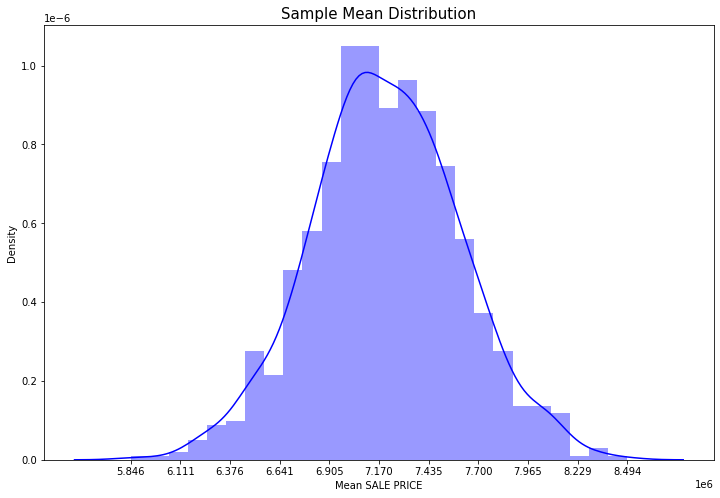

In [31]:
bin_edges = np.histogram(sample_mean)[1]
plt.figure(figsize=(12,8))
sns.distplot(sample_mean, kde=True, color='blue')
plt.title('Sample Mean Distribution', fontsize=15)
plt.xticks(np.round(bin_edges, 2))
plt.xlabel("Mean SALE PRICE");

Dapat dilihat data yang kita punya sudah berdistribusi normal.

Ringkasan statistik Sampling Distribution (sample size = 1000)

In [32]:
mean_sampling = np.mean(sample_mean)
median_sampling = np.median(sample_mean)
std_sampling = np.std(sample_mean)
std_error = std_sampling/np.sqrt(r)
z_score = 1.96


print(f"Mean: {mean_sampling}")
print(f"Median: {median_sampling}")
print(f"Standard Deviation: {std_sampling}")
print(f"Standard Error: {std_error}")
print(f"Z-Score: {z_score}")

Mean: 7205694.8021599995
Median: 7198182.6
Standard Deviation: 396369.3518316535
Standard Error: 39636.93518316535
Z-Score: 1.96


Dapat dilihat juga bahwa mean dan median sudah cukup dekat, yang artinya data ini berdistribusi normal. Selanjutnya kita hitung batas 95% mean sample dari mean populasi.

In [33]:
lower = mean_sampling - (z_score * std_error)
upper = mean_sampling + (z_score * std_error)

print(f"{lower} < x < {upper}")

7128006.409200995 < x < 7283383.195119004


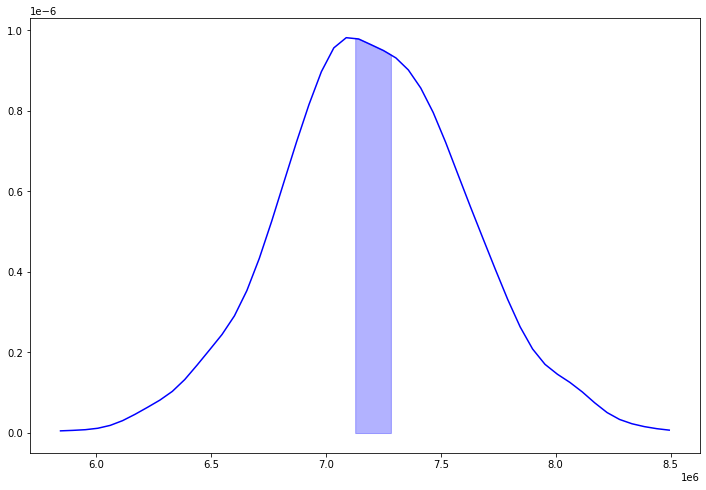

In [34]:
plt.figure(figsize=(12,8))
kde = stats.gaussian_kde(sample_mean)
pos = np.linspace(np.min(sample_mean), np.max(sample_mean))
plt.plot(pos, kde(pos), color='blue')
shade = np.linspace(lower, upper)
plt.fill_between(shade, kde(shade), alpha=0.3, color='blue')

Menurut hasil perhitungan diatas, mendapatkan nilai batas bawah sebesar 7117873.10 dan batas atas sebesar 7276194.00.

## **3.9. Apakah ada hubungan antara SALE PRICE dan LAND SQUARE FEET (Hypothesis Testing)**

Apakah ada hubungan antara SALE PRICE dan LAND SQUARE FEET?

**H0**: Tidak ada hubungan antara SALE PRICE dan LAND SQUARE FEET

**H1**: Ada hubungan antara SALE PRICE dan LAND SQUARE FEET

In [35]:
# Filter data untuk wilayah Manhattan dan Bronx
stat, p = stats.pearsonr(df["SALE PRICE"], df["LAND SQUARE FEET"])
p

2.316881472668383e-11

Dapat dilihat bahwa nilai p kurang dari 0.05, yang artinya **H1** diterima (Ada hubungan antara SALE PRICE dan LAND SQUARE FEET).

---

# **4. Kesimpulan**

1. Manhattan menjadi wilayah yang setidaknya memiliki harga penjualan paling tinggi, yaitu sebesar 6,500,000.00 USD Dollar dan Bronx mempunyai nilai setidaknya yang paling rendah, yaitu sebesar 480,000.00 USD Dollar. 
2. 4469.91 square feet menjadi rata-rata luas tanah yang terjual di wilayah Bronx.
3. Properti yang dibangun pada tahun 1970 menjadi yang paling banyak terjual di wilayah Staten Island dengan jumlah 348 yang terjual di tahun 2016-2017.
4. Pada daerah Alphabet City memiliki rentang harga properti yang berkisar 13,039,160 USD Dollar dengan luas bangunan terkecil sebesar 3,192,840 USD Dollar dan terbesar sebesar 16,232,000 USD Dollar.
5. Harga jual di daerah Alphabet City tidak memiliki distribusi normal (skew ke kiri), yang artinya ada properti yang terjual di harga sangat tinggi dari rata-rata harga properti di daerah Alphabet City.
6. Ada hubungan antara SALE PRICE dan LAND SQUARE FEET.

Tetapi, dibutuhkan analisis yang lebih lanjut dan dalam untuk menemukan insight menarik lainnya.

---
Sekian dari saya terima kasih!

Salam hormat,

Fikri Fahreza